In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


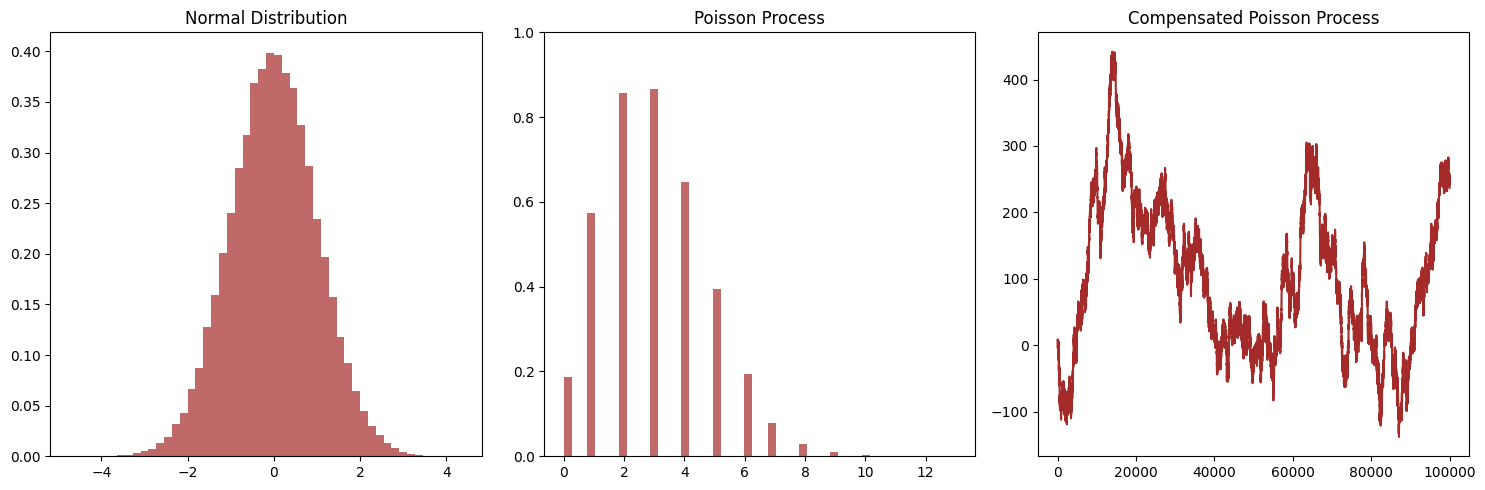

In [2]:
# Simulate normal distribution
normal_data = np.random.normal(loc=0, scale=1, size=100000)

# Simulate Poisson process
lam = 3
poisson_data = np.random.poisson(lam=lam, size=100000)

# Simulate compensated Poisson process
compensated_poisson_data = np.cumsum(poisson_data) - (lam * np.arange(1, len(poisson_data) + 1))

# Plot the simulations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(normal_data, bins=50, density=True, alpha=0.7, color="brown")
axes[0].set_title('Normal Distribution')

axes[1].hist(poisson_data, bins=50, density=True, alpha=0.7, color="brown")
axes[1].set_title('Poisson Process')
axes[1].set_ylim([0, 1.0])  # Set y-axis limit

axes[2].plot(compensated_poisson_data, color="brown")
axes[2].set_title('Compensated Poisson Process')

# Set the font type and size
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

plt.tight_layout()
plt.show()


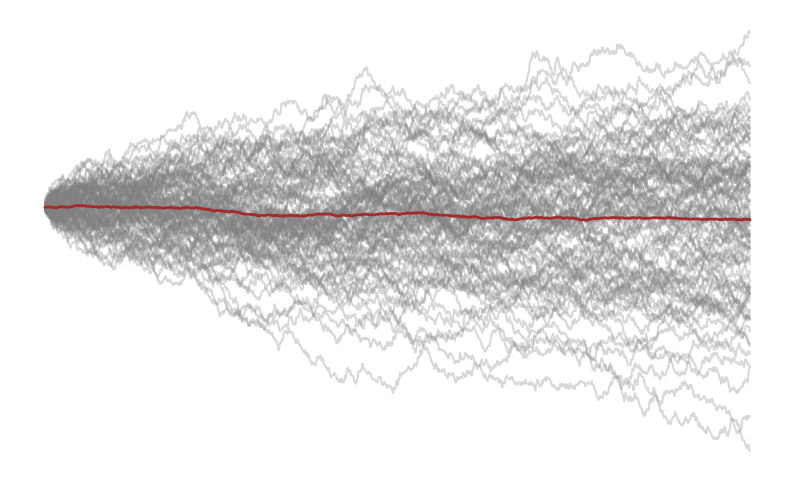

In [3]:
# Simulate Poisson process
lam = 3
poisson_data = np.random.poisson(lam=lam, size=(100, 1000))

# Simulate compensated Poisson process for each path
compensated_poisson_data = np.cumsum(poisson_data, axis=1) - (lam * np.arange(1, len(poisson_data[0]) + 1))

# Plot the paths in grey
plt.figure(figsize=(10, 6))
for i in range(len(compensated_poisson_data)):
    plt.plot(compensated_poisson_data[i], color='grey', alpha=0.3)

# Plot the mean as a thick brown line
mean = np.mean(compensated_poisson_data, axis=0)
plt.plot(mean, color='brown', linewidth=2, label='Mean')
plt.grid(False)
plt.axis('off')
plt.show()


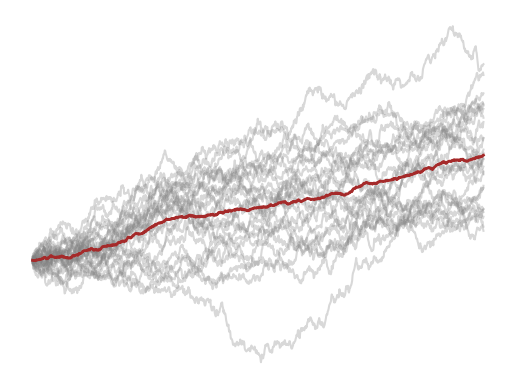

In [4]:
# Define the number of steps, the step size, and the number of paths
num_steps = 1000
step_size = 1
mu = 50
num_paths = 25

# Initialize an array to store the paths
paths = np.zeros((num_paths, num_steps))

# Generate the paths
for i in range(num_paths):
    increments = np.random.normal(loc=mu/num_steps, scale=np.sqrt(step_size), size=num_steps)
    paths[i] = np.cumsum(increments)

# Calculate the mean path
mean_path = np.mean(paths, axis=0)

# Set the font type and size
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

# Plot the paths in grey
for i in range(num_paths):
    plt.plot(paths[i], color='grey', alpha=0.3)

# Plot the mean path in brown
plt.plot(mean_path, color='brown', linewidth=2)

plt.grid(False)
plt.axis('off')
plt.show()

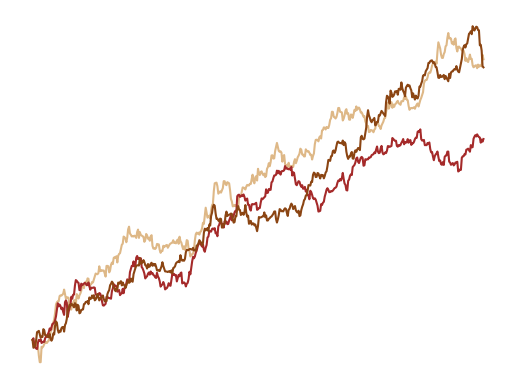

In [5]:
#%%
"""
Created on Thu Jan 11 2019
Paths for the Jump diffusion process of Merton
@author: Lech A. Grzelak
https://github.com/LechGrzelak/QuantFinanceBook/blob/master/PythonCodes
"""

def GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma):    

    # Create empty matrices for Poisson and compensated Poisson process

    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0
    
    # Expectation E(e^J) for J~N(muJ,sigmaJ^2)

    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)
    ZPois = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    Z = np.random.normal(2,1.0,[NoOfPaths,NoOfSteps])
    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])
    for i in range(0,NoOfSteps):

        X[:,i+1]  = X[:,i] + (r - xiP*(EeJ-1) - 0.5*sigma*sigma)*dt +sigma*np.sqrt(dt)* Z[:,i]\
                    + J[:,i] * ZPois[:,i]
        time[i+1] = time[i] +dt
        
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 3
    NoOfSteps = 500
    T = 100
    xiP = 20
    muJ = 0
    sigmaJ = 0.2
    sigma = 0.2
    S0 =1
    r=0.05
    Paths = GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]

    return timeGrid, X, S
                       
timeGrid, X, S = mainCalculation()

# Define a colormap with different shades of brown
cmap = LinearSegmentedColormap.from_list("mycmap", ["#DEB887", "#A52A2A", "#8B4513", "#5E2612"])

# Transpose X
X_transposed = np.transpose(X)

# Get the number of lines to plot
num_lines = np.shape(X_transposed)[1]

# Create line plot with different shades of brown
for i in range(num_lines):
    plt.plot(timeGrid, X_transposed[:,i], color=cmap(i / num_lines))


plt.grid(False)
plt.axis('off')
plt.show()